In [ ]:
from fbprophet import Prophet

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sales = pd.read_csv('/Users/michaelkareev/Desktop/Data Science Recruiting Related/Time-Series/three_by_day.csv')

In [ ]:
sales.dtypes
sales.head()

In [ ]:
#three separate dataframes 
saks = sales[sales['Merchant']=='SAKS.COM']
barneys = sales[sales['Merchant']=='BARNEYS NEW YORK']
nordstrom = sales[sales['Merchant']=='NORDSTROM']

In [ ]:
#Drop merchant from respective dataframes
saks.drop('Merchant', axis=1, inplace = True)
barneys.drop('Merchant', axis=1, inplace = True)
nordstrom.drop('Merchant', axis=1, inplace = True)

In [ ]:
#Rename the columns to something shorter
saks.rename(index=str, columns={"Date (Weeks Starting 1st day of Year)": "Date","MV - Accepted (MCCY)" : "MV"}, inplace = True)
barneys.rename(index=str, columns={"Date (Weeks Starting 1st day of Year)": "Date","MV - Accepted (MCCY)" : "MV"}, inplace = True)
nordstrom.rename(index=str, columns={"Date (Weeks Starting 1st day of Year)": "Date","MV - Accepted (MCCY)" : "MV"}, inplace = True)

In [ ]:
saks['Date'] = pd.to_datetime(saks['Date'])
barneys['Date'] = pd.to_datetime(barneys['Date'])
nordstrom['Date'] = pd.to_datetime(nordstrom['Date'])

In [ ]:
#Index column is now a date column
#saks.set_index('Date', inplace = True)
#barneys.set_index('Date', inplace = True)
nordstrom.set_index('Date', inplace = True)

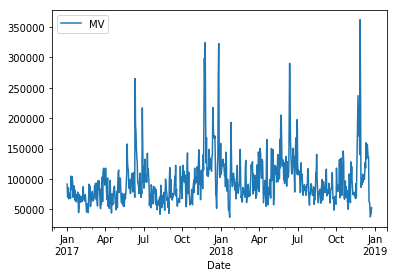

In [89]:
saks.plot()

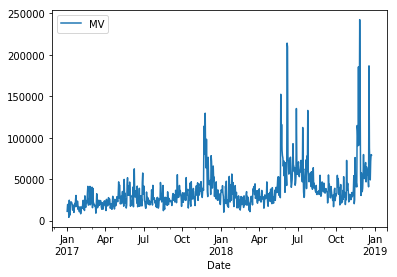

In [88]:
barneys.plot()

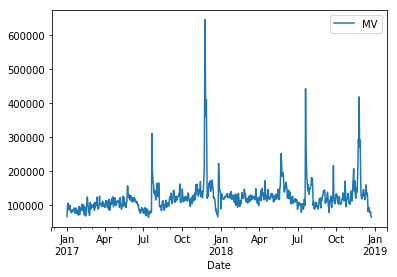

In [90]:
nordstrom.plot()

In [ ]:
nordstrom['MV_log'] = np.log(nordstrom['MV'])
nordstrom.head(5)

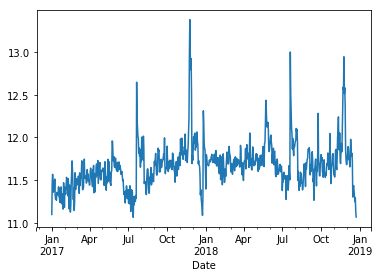

In [96]:
nordstrom['MV_log'].plot()

In [114]:
df_n = nordstrom.copy()

In [116]:
df_n.drop(['MV'], axis =1, inplace = True)

In [130]:
df_n.rename(columns={'Date': 'ds','MV_log' : 'y'}, inplace = True)

In [136]:
df_n.rename_axis("ds", axis='index', inplace=True)

In [148]:
df_n.reset_index(inplace = True)

In [149]:
df_n.head()

,ds,y
0,2017-01-01 00:00:00,11.099922
1,2017-01-02 00:00:00,11.475078
2,2017-01-03 00:00:00,11.568464
3,2017-01-04 00:00:00,11.476583
4,2017-01-05 00:00:00,11.360811


In [150]:
df_n.dtypes

ds     object
y     float64
dtype: object

In [157]:
#fit the model
m=Prophet(yearly_seasonality = True)
m.fit(df_n)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [159]:
#forecasting 365 days into future
n_future = m.make_future_dataframe(periods = 365)
n_future.tail()

,ds
1082,2019-12-19
1083,2019-12-20
1084,2019-12-21
1085,2019-12-22
1086,2019-12-23


In [160]:
#populate the forecast 
n_forecast = m.predict(n_future)
n_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1082,2019-12-19,11.064458,10.605105,11.132054,10.914257,11.199697,-0.193776,-0.193776,-0.193776,-0.025697,-0.025697,-0.025697,-0.168079,-0.168079,-0.168079,0.0,0.0,0.0,10.870683
1083,2019-12-20,11.063081,10.595330,11.134045,10.912297,11.198414,-0.199034,-0.199034,-0.199034,-0.019108,-0.019108,-0.019108,-0.179926,-0.179926,-0.179926,0.0,0.0,0.0,10.864048
1084,2019-12-21,11.061705,10.593820,11.140019,10.910351,11.197416,-0.205003,-0.205003,-0.205003,-0.016957,-0.016957,-0.016957,-0.188046,-0.188046,-0.188046,0.0,0.0,0.0,10.856702
1085,2019-12-22,11.060328,10.623286,11.161784,10.908432,11.196975,-0.154968,-0.154968,-0.154968,0.037643,0.037643,0.037643,-0.192611,-0.192611,-0.192611,0.0,0.0,0.0,10.905359
1086,2019-12-23,11.058951,10.622238,11.162123,10.906513,11.196523,-0.151351,-0.151351,-0.151351,0.042495,0.042495,0.042495,-0.193846,-0.193846,-0.193846,0.0,0.0,0.0,10.907599


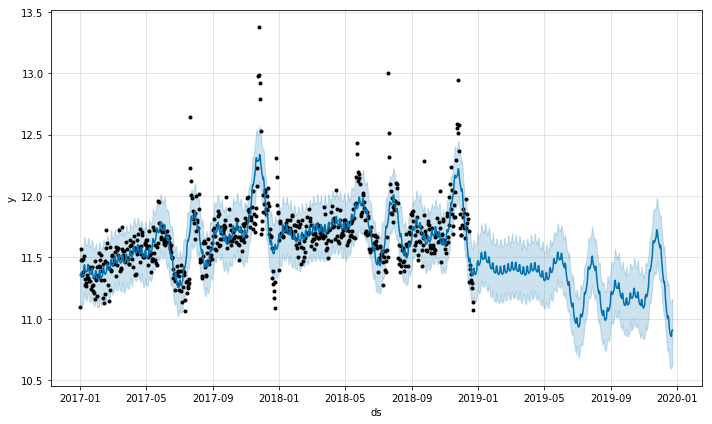

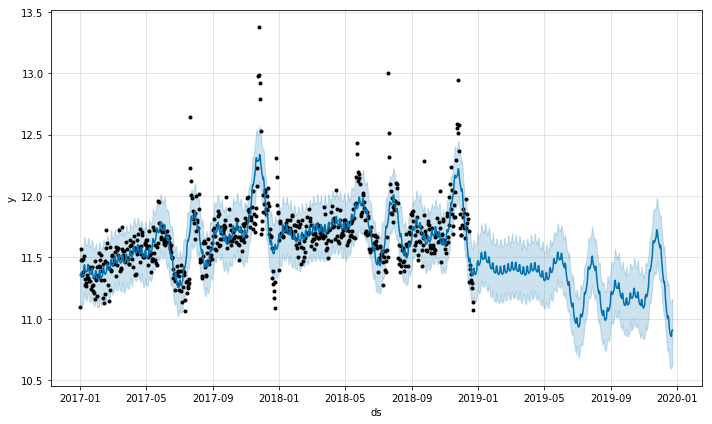

In [161]:
#plot the forecast
m.plot(n_forecast)